In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

### eda inicial

In [24]:
me = pd.read_csv('new/totales-2023.csv')

In [25]:
me

,fecha,poblacion,Edad0-15,Edad16-30,Edad31-45,Edad46-60,Edad61-75,Edad76-90,Edad91-105,hombres,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO
0,2023-01-03T00:00:00.000000000Z,6396276,177929,825617,1087271,753890,248019,67543,7583,1359860,...,13335,55588,13890,278836,38776,22156,207633,19324,129017,832685
1,2023-01-03T00:00:00.000000000Z,6470943,178896,832530,1097921,762848,252350,68991,7773,1373398,...,13622,56269,14114,283120,39345,22574,210084,19597,130430,838865
2,2023-01-03T00:00:00.000000000Z,6541413,179990,838573,1107643,771016,256047,70250,7928,1385535,...,13849,56936,14349,287059,40007,22919,212649,19845,131754,844272
3,2023-01-03T00:00:00.000000000Z,6607859,181180,844001,1116163,778049,259392,71360,8076,1396474,...,14039,57528,14550,290663,40628,23258,215086,20081,132991,848962
4,2023-01-03T00:00:00.000000000Z,6669733,182268,849117,1124184,784580,262250,72299,8195,1406541,...,14250,58140,14734,293873,41166,23521,217445,20271,134113,852934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-28T00:00:00.000000000Z,1199527,18438,96201,134119,110694,49862,16410,2007,170008,...,3304,9886,3187,55523,9307,4953,42174,3430,18759,65630
100,2023-12-05T00:00:00.000000000Z,1204080,18449,96221,134125,110712,49879,16418,2009,170042,...,3306,9889,3191,55539,9311,4957,42180,3434,18766,65653
101,2023-12-12T00:00:00.000000000Z,1208798,18465,96234,134142,110728,49886,16429,2009,170084,...,3309,9889,3196,55552,9313,4960,42184,3437,18771,65679
102,2023-12-19T00:00:00.000000000Z,1213161,18475,96258,134158,110754,49913,16444,2011,170130,...,3316,9896,3201,55581,9321,4966,42198,3443,18778,65721


In [26]:
df_sum = pd.DataFrame(me.sum()).transpose()
df_sum.to_csv('new/totales-2023-sum.csv', )

In [27]:
df3= pd.read_csv('new/totales-2023-sum.csv')
df2= pd.read_csv('new/totales-str2022.csv')
df1= pd.read_csv('new/totales-2021.csv')
peru = pd.read_csv('/home/sistemas/Documents/sexto/Covid-LATAM-Study/peru/peru.csv')
arg = pd.read_csv('arg/d/argentina2020-2021.csv')


In [28]:
df_concat = pd.concat([df3, df2, df1, peru, arg], ignore_index=True, sort=False).fillna(0)

In [29]:
df_concat.index = ['2023Mx', '2022Mx', '2021Mx', 'Peru', 'Argentina']

In [30]:
df_concat

,Unnamed: 0,fecha,poblacion,Edad0-15,Edad16-30,Edad31-45,Edad46-60,Edad61-75,Edad76-90,Edad91-105,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,intubado
2023Mx,0,2023-01-03T00:00:00.000000000Z2023-01-03T00:00...,371663562,9251102,43787632,58371196,41929918,14888436,4275580,494180,...,3211640.0,856110.0,16646634.0,2438650.0,1359990.0,12394218.0,1119380.0,7167846.0,41894362.0,0.0
2022Mx,0,MEXICO2022,6451944,179446,832181,1095633,760465,251159,68546,7696,...,56037.0,14052.0,281625.0,39077.0,22451.0,209198.0,19501.0,130049.0,838048.0,0.0
2021Mx,0,MEXICO2021,8830345,126870,711526,797642,552680,249875,80514,7335,...,43386.0,12542.0,298535.0,35780.0,23023.0,245536.0,23504.0,150832.0,876465.0,0.0
Peru,0,0,4806278,228397,1092614,1498971,1037910,533848,175023,18126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,0,0,29971992,2392664,7607839,9587935,6140091,3041524,1028755,160981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40493.0


In [31]:
df_concat.drop(columns=['Unnamed: 0','fecha'], inplace=True)
df_concat

,poblacion,Edad0-15,Edad16-30,Edad31-45,Edad46-60,Edad61-75,Edad76-90,Edad91-105,hombres,mujeres,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,intubado
2023Mx,371663562,9251102,43787632,58371196,41929918,14888436,4275580,494180,73273110,99739264,...,3211640.0,856110.0,16646634.0,2438650.0,1359990.0,12394218.0,1119380.0,7167846.0,41894362.0,0.0
2022Mx,6451944,179446,832181,1095633,760465,251159,68546,7696,1371223,1824186,...,56037.0,14052.0,281625.0,39077.0,22451.0,209198.0,19501.0,130049.0,838048.0,0.0
2021Mx,8830345,126870,711526,797642,552680,249875,80514,7335,1237785,1288864,...,43386.0,12542.0,298535.0,35780.0,23023.0,245536.0,23504.0,150832.0,876465.0,0.0
Peru,4806278,228397,1092614,1498971,1037910,533848,175023,18126,2458481,2347797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,29971992,2392664,7607839,9587935,6140091,3041524,1028755,160981,13968570,15842503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40493.0


In [32]:
df = df_concat.T
df.to_csv('new/mx-arg-peru-draft.csv');df
#df.columns.values[0] = ""
df = df.rename(index={"": "new_name"})

In [33]:
df = df.rename(index={"Unnamed 0": "new_name"})
df.to_csv('new/mx-arg-peru-draft.csv');df

,2023Mx,2022Mx,2021Mx,Peru,Argentina
poblacion,371663562.0,6451944.0,8830345.0,4806278.0,29971992.0
Edad0-15,9251102.0,179446.0,126870.0,228397.0,2392664.0
Edad16-30,43787632.0,832181.0,711526.0,1092614.0,7607839.0
Edad31-45,58371196.0,1095633.0,797642.0,1498971.0,9587935.0
Edad46-60,41929918.0,760465.0,552680.0,1037910.0,6140091.0
Edad61-75,14888436.0,251159.0,249875.0,533848.0,3041524.0
Edad76-90,4275580.0,68546.0,80514.0,175023.0,1028755.0
Edad91-105,494180.0,7696.0,7335.0,18126.0,160981.0
hombres,73273110.0,1371223.0,1237785.0,2458481.0,13968570.0
mujeres,99739264.0,1824186.0,1288864.0,2347797.0,15842503.0


### merge listo

In [34]:
d = pd.read_csv('new/mx-arg-peru-draft.csv',)

In [35]:
d.columns

Index(['Unnamed: 0', '2023Mx', '2022Mx', '2021Mx', 'Peru', 'Argentina'], dtype='object')

In [36]:
d.to_csv('new/mx-arg-peru-draft.csv')

In [37]:
d.iloc[:19,:]
d = d.rename(columns={"Unnamed: 0": "Variables"})
d.set_index('Variables', inplace=True)
d.to_csv('new/mx-arg-peru-draft1.csv')

In [38]:
d.to_csv('new/mx-arg-peru-draft1.csv')
d

,2023Mx,2022Mx,2021Mx,Peru,Argentina
Variables,,,,,
poblacion,371663562.0,6451944.0,8830345.0,4806278.0,29971992.0
Edad0-15,9251102.0,179446.0,126870.0,228397.0,2392664.0
Edad16-30,43787632.0,832181.0,711526.0,1092614.0,7607839.0
Edad31-45,58371196.0,1095633.0,797642.0,1498971.0,9587935.0
Edad46-60,41929918.0,760465.0,552680.0,1037910.0,6140091.0
Edad61-75,14888436.0,251159.0,249875.0,533848.0,3041524.0
Edad76-90,4275580.0,68546.0,80514.0,175023.0,1028755.0
Edad91-105,494180.0,7696.0,7335.0,18126.0,160981.0
hombres,73273110.0,1371223.0,1237785.0,2458481.0,13968570.0


### draft1

In [39]:
d.iloc[:19,:]

,2023Mx,2022Mx,2021Mx,Peru,Argentina
Variables,,,,,
poblacion,371663562.0,6451944.0,8830345.0,4806278.0,29971992.0
Edad0-15,9251102.0,179446.0,126870.0,228397.0,2392664.0
Edad16-30,43787632.0,832181.0,711526.0,1092614.0,7607839.0
Edad31-45,58371196.0,1095633.0,797642.0,1498971.0,9587935.0
Edad46-60,41929918.0,760465.0,552680.0,1037910.0,6140091.0
Edad61-75,14888436.0,251159.0,249875.0,533848.0,3041524.0
Edad76-90,4275580.0,68546.0,80514.0,175023.0,1028755.0
Edad91-105,494180.0,7696.0,7335.0,18126.0,160981.0
hombres,73273110.0,1371223.0,1237785.0,2458481.0,13968570.0


In [40]:
179446.0/6451944.0

0.027812702652099893

In [41]:
#d.to_csv('new/mx-arg-peru-draft1.csv')
d = pd.read_csv('new/mx-arg-peru-draft1.csv')
d.set_index('Variables', inplace=True)
#d.to_csv('new/mx-arg-peru-draft1.csv')
d.iloc[:19,:]
d2 = round(d.iloc[:,:]/d.iloc[0,:]*100,2);d2

,2023Mx,2022Mx,2021Mx,Peru,Argentina
Variables,,,,,
poblacion,100.00,100.00,100.00,100.00,100.00
Edad0-15,2.49,2.78,1.44,4.75,7.98
Edad16-30,11.78,12.90,8.06,22.73,25.38
Edad31-45,15.71,16.98,9.03,31.19,31.99
Edad46-60,11.28,11.79,6.26,21.59,20.49
Edad61-75,4.01,3.89,2.83,11.11,10.15
Edad76-90,1.15,1.06,0.91,3.64,3.43
Edad91-105,0.13,0.12,0.08,0.38,0.54
hombres,19.71,21.25,14.02,51.15,46.61


In [42]:
d.columns

Index(['2023Mx', '2022Mx', '2021Mx', 'Peru', 'Argentina'], dtype='object')

In [43]:
df3 = d.copy()
for i in d.columns:
    df3[i] = d[i].astype(str) + ' (' + d2[i].astype(str) + '%)'

<Axes: title={'center': 'Distribución edades 2023 MX'}, xlabel='Variables'>

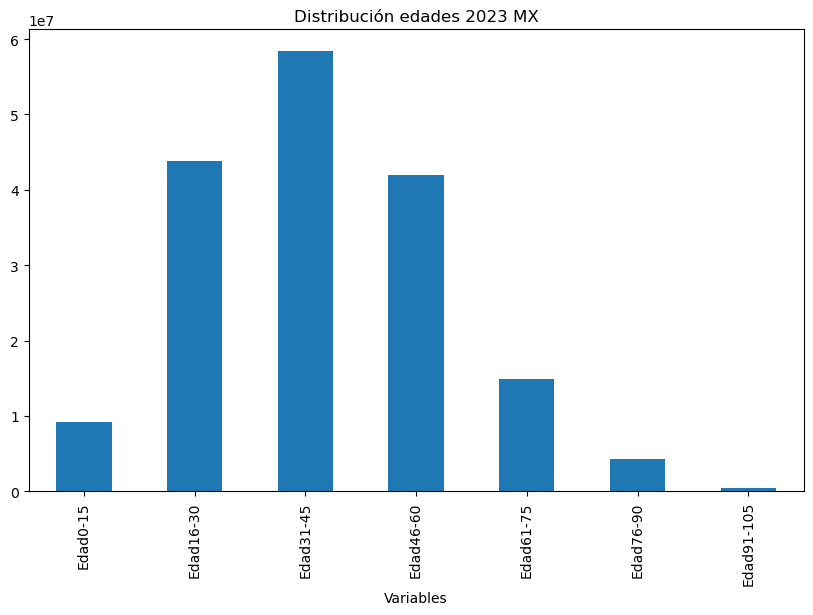

In [44]:
d.iloc[1:8,0].plot(kind='bar', stacked=True, title=f'Distribución edades 2023 MX', figsize=(10, 6))

In [45]:
#df3.to_csv('new/mx-arg-peru-draft2.csv')
#df3.to_latex('new/mx-arg-peru-draft2.tex')
df3

,2023Mx,2022Mx,2021Mx,Peru,Argentina
Variables,,,,,
poblacion,371663562.0 (100.0%),6451944.0 (100.0%),8830345.0 (100.0%),4806278.0 (100.0%),29971992.0 (100.0%)
Edad0-15,9251102.0 (2.49%),179446.0 (2.78%),126870.0 (1.44%),228397.0 (4.75%),2392664.0 (7.98%)
Edad16-30,43787632.0 (11.78%),832181.0 (12.9%),711526.0 (8.06%),1092614.0 (22.73%),7607839.0 (25.38%)
Edad31-45,58371196.0 (15.71%),1095633.0 (16.98%),797642.0 (9.03%),1498971.0 (31.19%),9587935.0 (31.99%)
Edad46-60,41929918.0 (11.28%),760465.0 (11.79%),552680.0 (6.26%),1037910.0 (21.59%),6140091.0 (20.49%)
Edad61-75,14888436.0 (4.01%),251159.0 (3.89%),249875.0 (2.83%),533848.0 (11.11%),3041524.0 (10.15%)
Edad76-90,4275580.0 (1.15%),68546.0 (1.06%),80514.0 (0.91%),175023.0 (3.64%),1028755.0 (3.43%)
Edad91-105,494180.0 (0.13%),7696.0 (0.12%),7335.0 (0.08%),18126.0 (0.38%),160981.0 (0.54%)
hombres,73273110.0 (19.71%),1371223.0 (21.25%),1237785.0 (14.02%),2458481.0 (51.15%),13968570.0 (46.61%)
